In [ ]:
from keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

深度学习keras demo

In [5]:
from keras import models
from keras import layers

In [6]:
# 构建网络架
# 使用Sequential类定义模型，仅用于层的线行堆叠
network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
network.add(layers.Dense(10, activation = 'softmax'))
network.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [7]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32') / 255

In [11]:
train_images.shape

(60000, 784)

In [8]:
# 对label进行one-hot编码
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [31]:
# 对模型进行训练
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.2574 - acc: 0.9252
Epoch 2/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.1050 - acc: 0.9695
Epoch 3/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0675 - acc: 0.9800
Epoch 4/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.0502 - acc: 0.9848
Epoch 5/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0371 - acc: 0.9885


In [32]:
# 在测试集上的表现
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 40us/step
test_acc: 0.9785


显示图片

In [33]:
import matplotlib.pyplot as plt

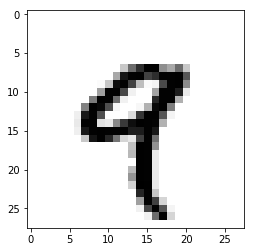

In [38]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = train_images[4]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()